# PREDICTIVE MAINTAINANCE ANALYSIS

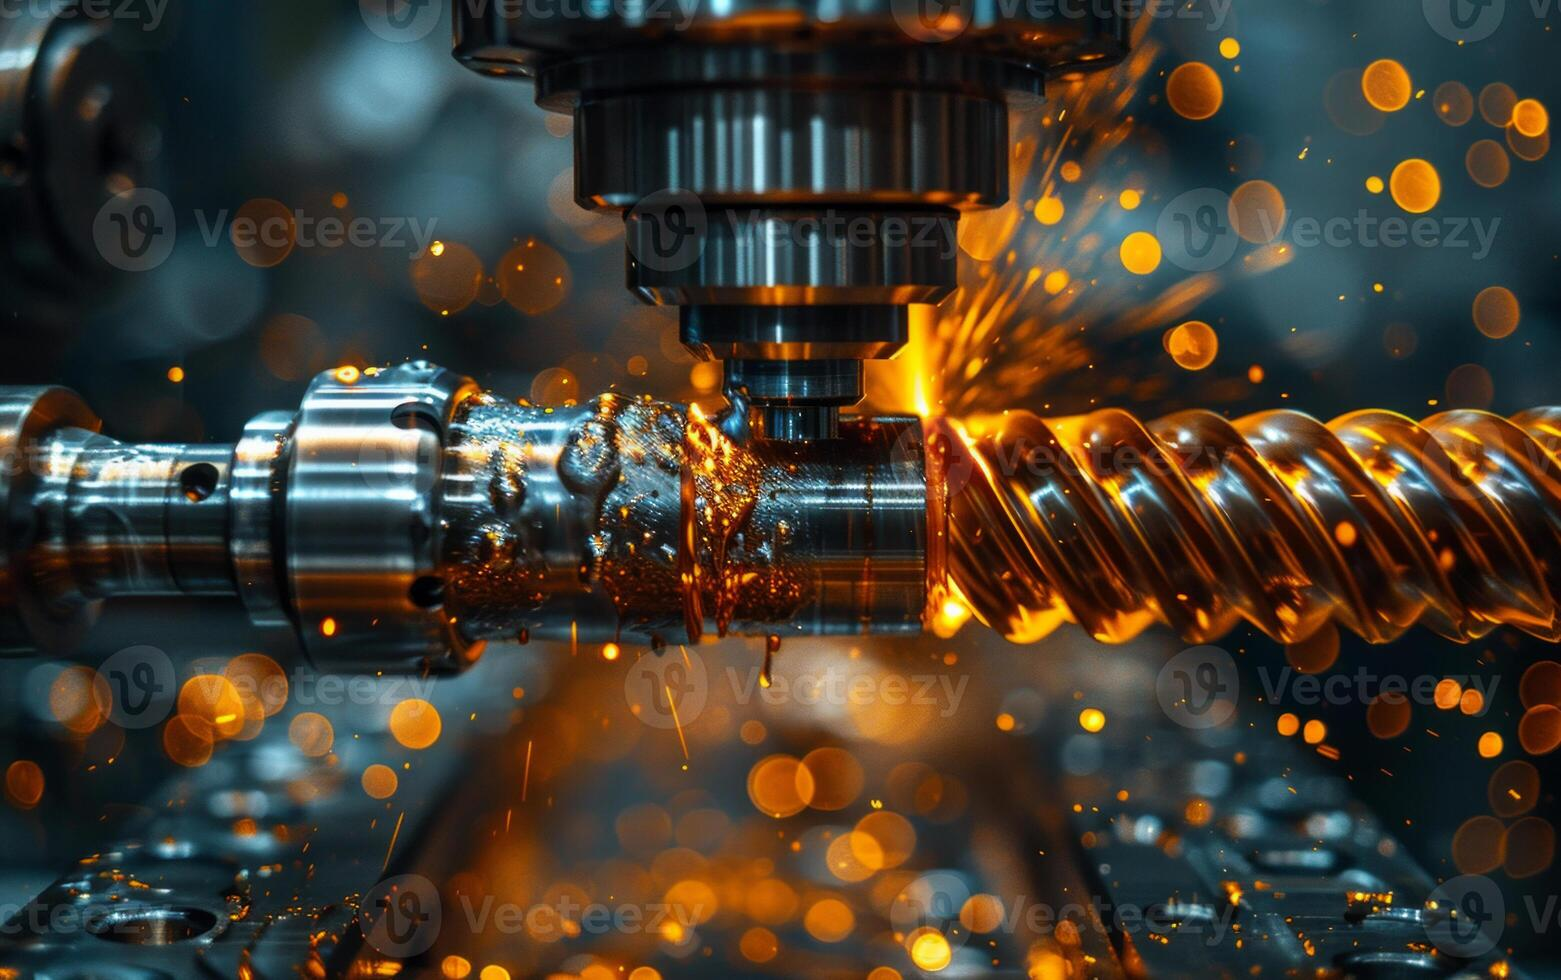

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/ML Update/IMG2.jpg',width=1100,height=400)

In [3]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd
# Import Data Visualisation Library
import matplotlib.pyplot as plt
import seaborn as sns
# Filter warning Library
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the data set using pandas Library
data = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/ML Update/predictive_maintenance.csv')
df = data.sample(frac=1)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9749,9750,H39163,H,298.8,310.1,1483,45.4,192,0,No Failure
2552,2553,H31966,H,299.3,309.1,1552,40.7,120,0,No Failure
2134,2135,L49314,L,299.3,309.0,1473,46.3,146,0,No Failure
48,49,H29462,H,298.8,309.2,1425,53.9,135,0,No Failure
369,370,H29783,H,297.5,308.4,1587,36.1,98,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
3801,3802,M18661,M,302.2,310.9,1771,27.6,54,0,No Failure
2900,2901,L50080,L,300.5,309.3,1574,33.5,101,0,No Failure
1727,1728,M16587,M,298.3,307.7,1602,33.4,106,0,No Failure
4952,4953,M19812,M,303.8,312.7,1374,53.6,136,0,No Failure


## Data Discription

In [6]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/ML Update/IMG1.jpg',width=1100,height=450)

In [7]:
# - After looking at the dataset, we can assume that the data is about the drilling tool used in a lathe machine.

# - The columns consist values of:
#     1. Air temperature in Kelvin (K)
#     2. Process temperature in Kelvin (K)
#     3. Rotational speed in Rotation per minute (RPM)
#     4. Torque in Newton meters (Nm)
#     5. Tool wear in minutes (min)

# - Type column is given to represent the type of product with respect to its quality. 
#   L, M and H are for Low, Medium and High quality products respectively.

# - ProductID consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a    variant-specific serial number.

# - The target column is the output of machine, if it is failing or not.
#   0 represents no failure whereas 1 represents that failure has occured.

# - An additional column of Failure Type is given so that we can understand what type of failure is occuring.

In [8]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 9749 to 3857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 859.4+ KB


In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
# From the above distribution we can get know the data is normally distributed 
# because the value of mean and median(50%) is close to each other so there is no need to skewness removal.

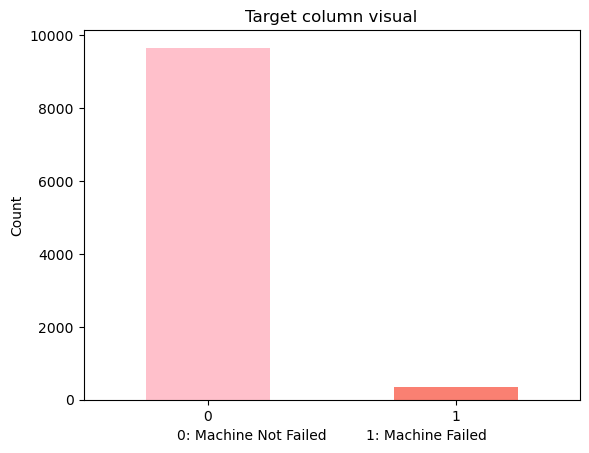

Target
0    9661
1     339
Name: count, dtype: int64

In [11]:
df['Target'].value_counts().plot(kind='bar',color=['Pink','salmon'])
plt.title('Target column visual')
plt.xlabel('0: Machine Not Failed         1: Machine Failed')
plt.ylabel('Count')
plt.xticks(rotation=1)
plt.show()
df['Target'].value_counts() 

In [12]:
# we can see that the the ratio of machine failure is less than as compare to no failure and so there is imbalance in two columns.

In [13]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

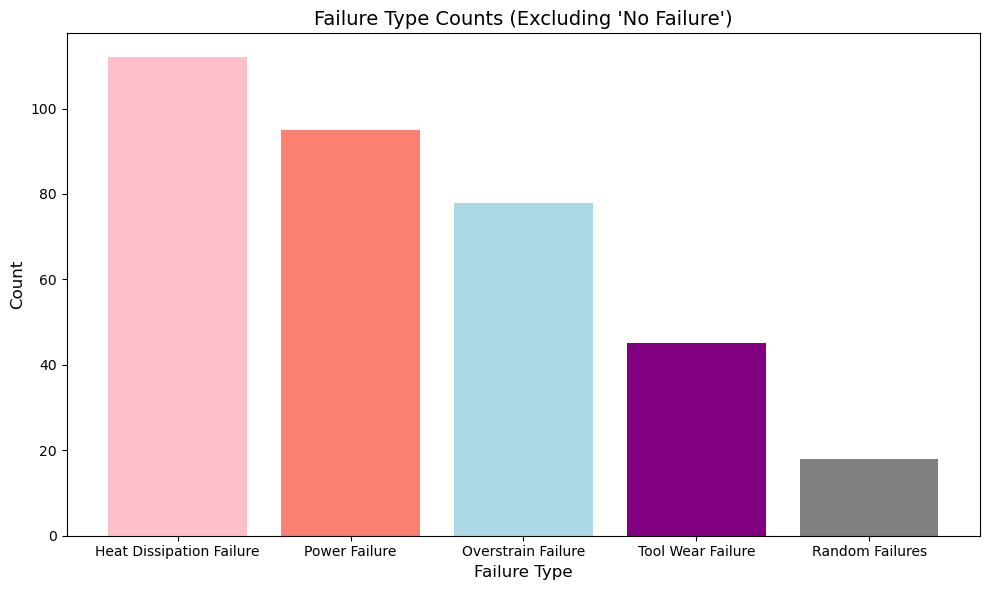

In [14]:
# Creating new dictionary to plot failure type on a bar plot

data = { 'Failed_type': ['Heat Dissipation Failure','Power Failure','Overstrain Failure','Tool Wear Failure','Random Failures'],
         'Counts': [112,95,78,45,18] }
data = pd.DataFrame(data)

plt.figure(figsize=(10,6))
plt.bar(data['Failed_type'],data['Counts'],color=['Pink','salmon','lightblue','purple','gray'])
plt.xlabel("Failure Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Failure Type Counts (Excluding 'No Failure')", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# - Here we can see the types of failures such as:

# - Heat Dissipation Failure : The failure that occurs due to overheating of the tool.
# - Power Failure : The failure occuring due to power cutout.
# - Overstrain Failure : Failure because of excessive strain on the tool.
# - Tool Wear Failure : Failure due to tool wear and tear that happens after excessive use of tool.
# - Random Failures : Random Failures can be any failure whose cause can't be assessed or any human error.

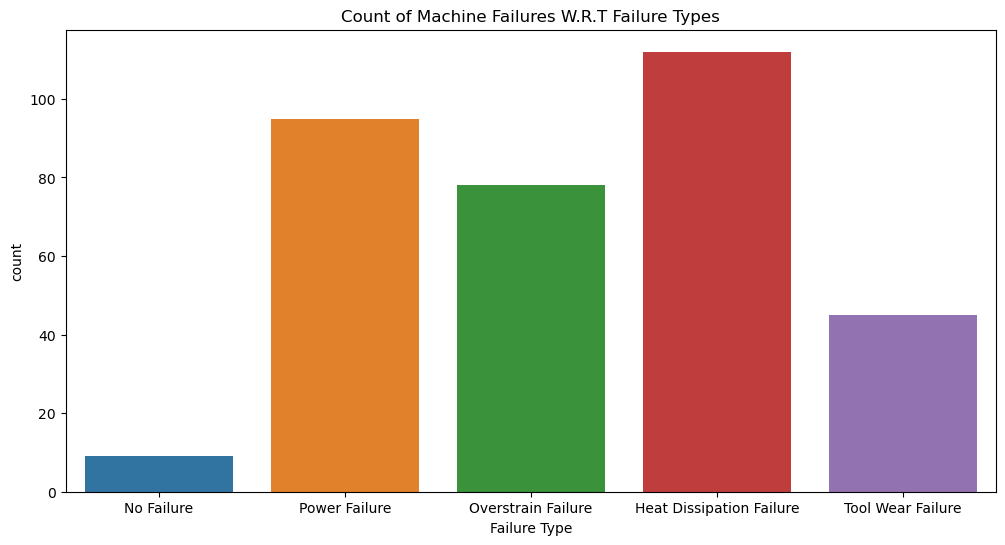

In [16]:
plt.figure(figsize = (12,6))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

In [17]:
# - In the above countplot we can see that "No Failure" is also plotted but that does not makes any sense. 
# - This means there are some fake values in the data. 
# - So we need to eliminate them.

In [18]:
df[(df['Target']== 1) & (df['Failure Type']== "No Failure")]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure


In [19]:
i = df[(df['Target']== 1) & (df['Failure Type']== "No Failure")].index
df.drop(i,axis=0,inplace=True) 

In [20]:
# Also, we cannot see anything related to Random Failures since they cannot be assesed. So we will drop the products with Random failures.

In [21]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")]
i

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
5553,5554,L52733,L,302.5,311.9,1306,59.7,172,0,Random Failures
6913,6914,L54093,L,300.8,311.2,1481,38.5,181,0,Random Failures
7488,7489,L54668,L,300.3,311.7,1545,43.5,160,0,Random Failures
5509,5510,L52689,L,302.8,312.2,1509,36.5,52,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures


In [22]:
i = df[(df['Target']== 0) & (df['Failure Type']== "Random Failures")].index
df.drop(i,axis=0,inplace=True)

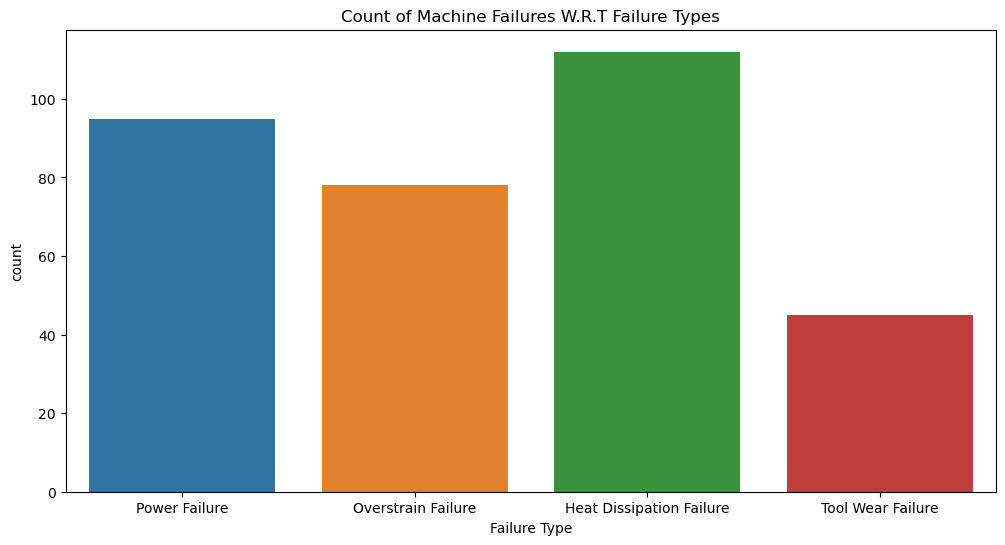

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Machine Failures W.R.T Failure Types")
plt.show()

In [24]:
# - From above graph we can see most of time our machine get failed due to Heat Dissipation Failure and after that Power Failure 
# - then Overstrain Failure and last Tool Wear Failure.

<Axes: title={'center': 'Percentage of Product Type'}, ylabel='count'>

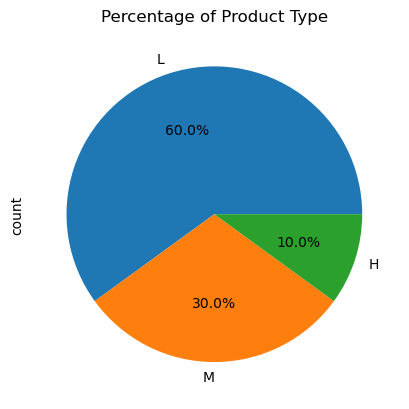

In [25]:
df['Type'].value_counts().plot(kind='pie',autopct='%.1f%%',title="Percentage of Product Type")

In [26]:
# From our total products 60% are low quality products and 30% are medium quality products then 10% are high quality products.

In [27]:
pd.DataFrame(df['Type'].value_counts())

,count
Type,
L,5984
M,2991
H,998


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 9749 to 3857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      9973 non-null   int64  
 1   Product ID               9973 non-null   object 
 2   Type                     9973 non-null   object 
 3   Air temperature [K]      9973 non-null   float64
 4   Process temperature [K]  9973 non-null   float64
 5   Rotational speed [rpm]   9973 non-null   int64  
 6   Torque [Nm]              9973 non-null   float64
 7   Tool wear [min]          9973 non-null   int64  
 8   Target                   9973 non-null   int64  
 9   Failure Type             9973 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 857.1+ KB


In [29]:
num_colunms = df.select_dtypes([int,float])
num_colunms.columns

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

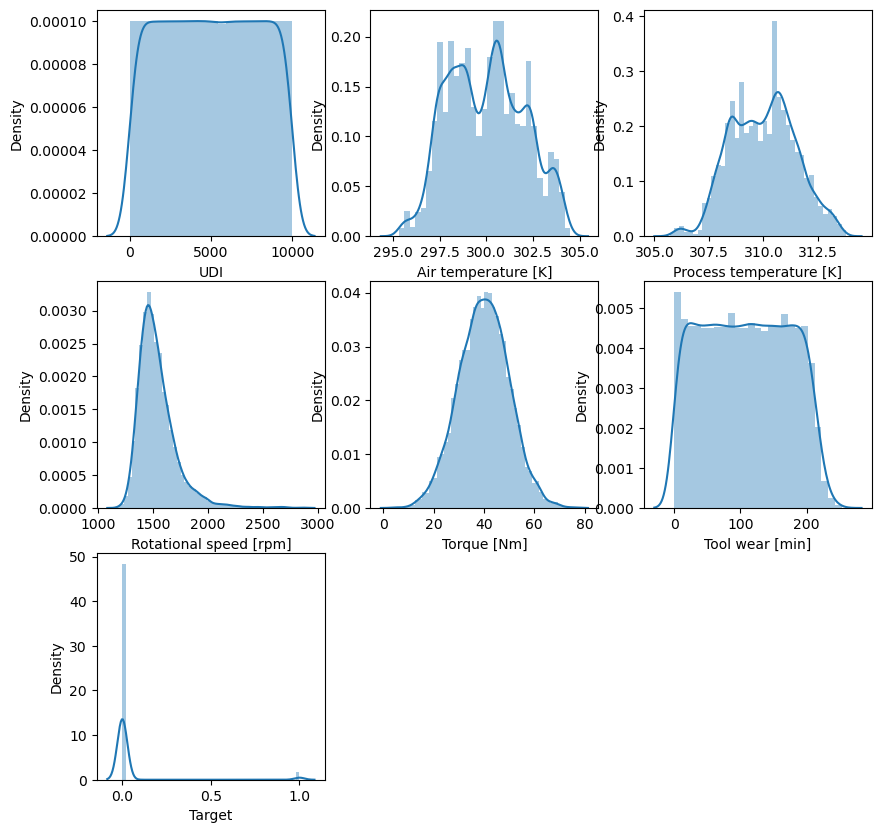

In [30]:
# Now we can see how the data is distributed
plt.figure(figsize=(10,10))
plot = 0
for i in num_colunms:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i])
plt.show()

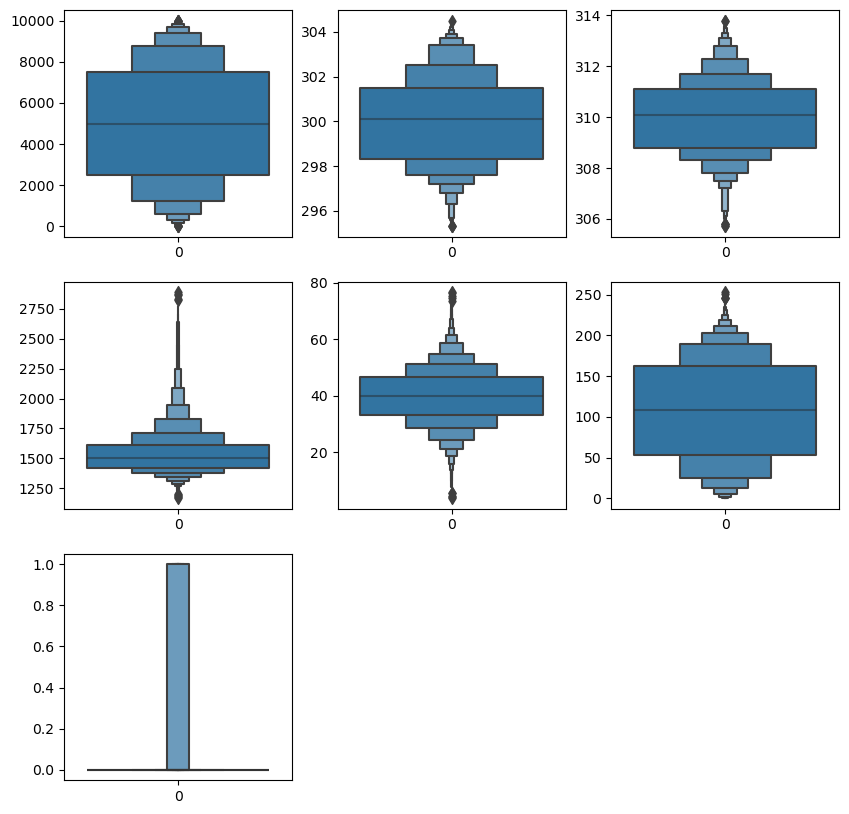

In [31]:
# And also we can see the data has no outliers
plt.figure(figsize=(10,10))
plot = 0
for i in num_colunms:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i])
plt.show()

<Axes: >

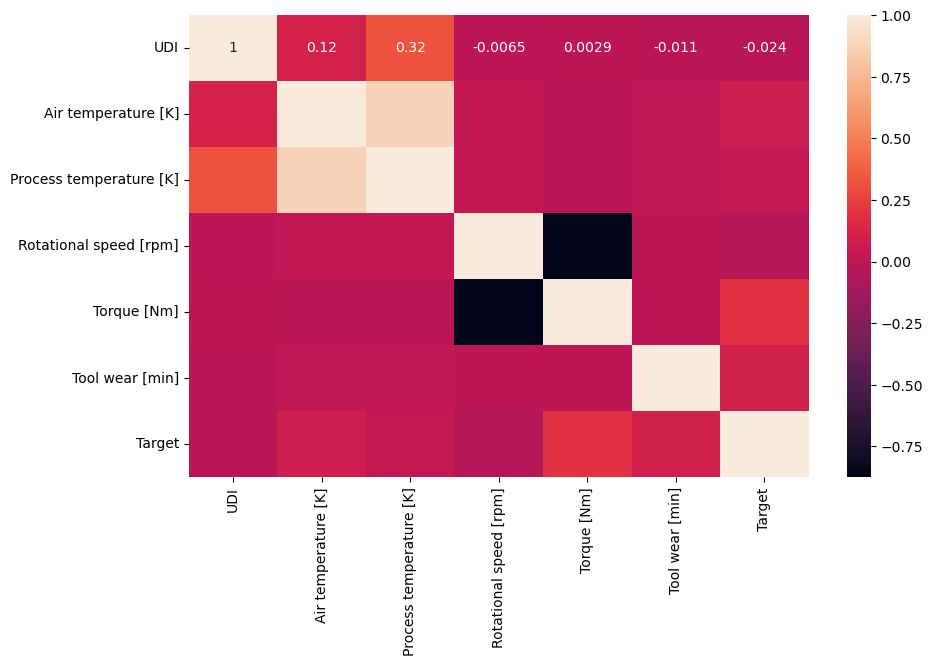

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap((df.select_dtypes([int,float]).corr()),annot=True)

In [33]:
# From above heatmap, we can see that there is no correlation between any two columns.

In [34]:
# Droping the unnecessary columns that we dont require 
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [35]:
# To see the correlation of columns with target column we plotting a line plot

In [36]:
features = df.drop(columns=['Target'],axis=1)
features.sample(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6294,L,301.1,310.5,1529,38.7,91
962,M,295.8,306.6,1480,43.2,92


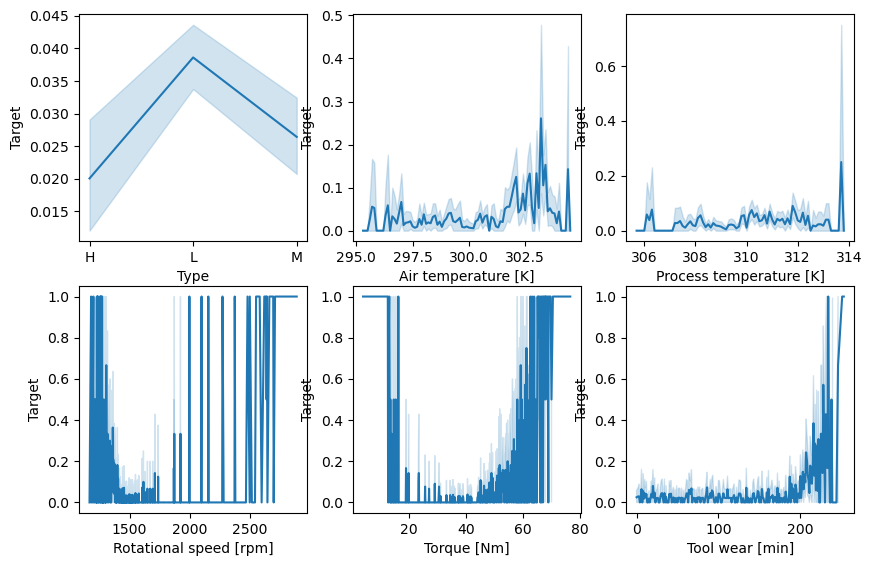

In [37]:
plt.figure(figsize=(10,10))
plot = 0
for i in features:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.lineplot(x=features[i],y=df['Target'])
plt.show()

In [38]:
# Here we can see that Rotational speed [rpm], Torque [Nm], Tool wear [min] are highly affecting our Target column

In [39]:
df.sample(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
7003,L,300.5,310.6,1540,46.7,206,0
7672,M,300.5,311.7,2141,17.2,196,0


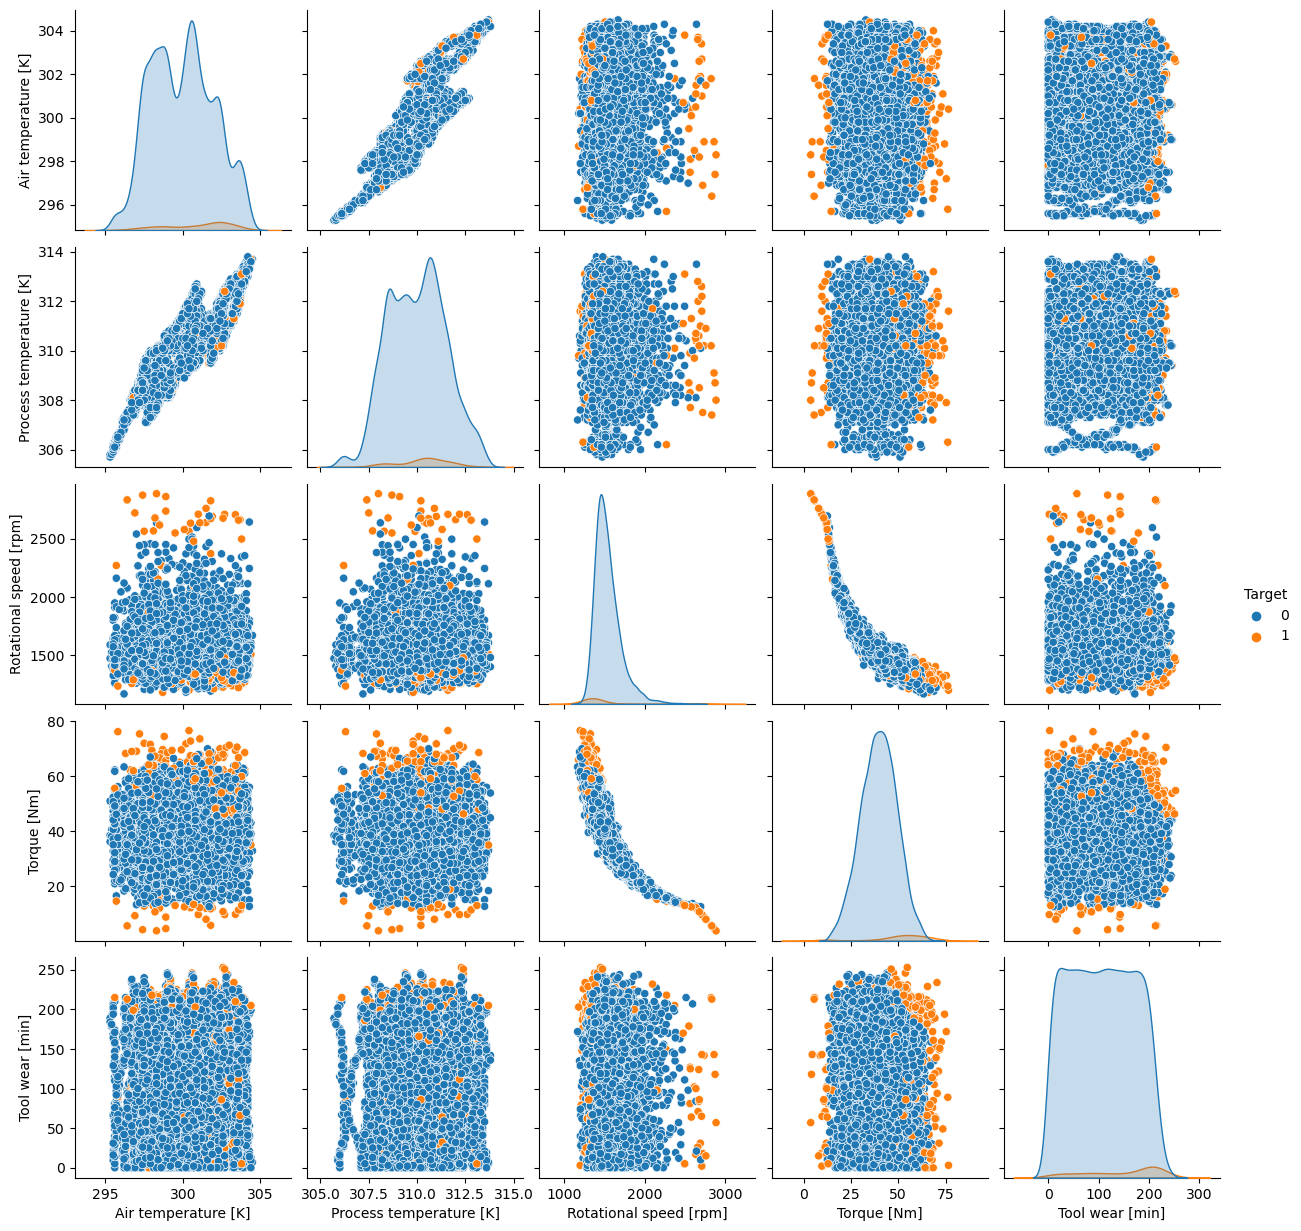

In [40]:
sns.pairplot(df,hue='Target')

In [41]:
# Handle categorical column
df['Type'].unique()

array(['H', 'L', 'M'], dtype=object)

In [42]:
# Replacing the categories with integers
df['Type'] = df['Type'].replace("L",0)
df['Type'] = df['Type'].replace("M",1)
df['Type'] = df['Type'].replace("H",2)

In [43]:
df.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6929,1,301.0,311.6,1301,55.0,9,0
7076,0,300.7,310.5,1960,21.0,194,0
4565,2,302.7,310.8,1275,55.0,25,1
3498,0,301.9,311.0,1289,54.9,128,0
4925,0,303.4,312.3,1680,30.6,67,0


## Splitting the Data into Features and Target

In [45]:
X = df.drop(columns='Target')
y = df['Target']

## Splitting the Data into Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.metrics import classification_report,accuracy_score,mean_squared_error,mean_absolute_error

In [49]:
def mymodel(model):
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    print(classification_report(ytest,ypred))
    print('Mean Absolute Error: ',mean_absolute_error(ytest,ypred))
    print('Mean Squared Error: ',mean_squared_error(ytest,ypred))
    return model   

In [50]:
# Here we created a function to check which Machine Learning Algorithm will be the best fit for our model. 
# We will select the one with highest accuracy.

### LogisticRegression()

In [52]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2893
           1       0.68      0.19      0.30        99

    accuracy                           0.97      2992
   macro avg       0.83      0.59      0.64      2992
weighted avg       0.96      0.97      0.96      2992

Mean Absolute Error:  0.029745989304812835
Mean Squared Error:  0.029745989304812835


LogisticRegression()

### KNeighborsClassifier

In [54]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2893
           1       0.72      0.21      0.33        99

    accuracy                           0.97      2992
   macro avg       0.85      0.60      0.66      2992
weighted avg       0.97      0.97      0.96      2992

Mean Absolute Error:  0.02874331550802139
Mean Squared Error:  0.02874331550802139


KNeighborsClassifier()

### DecisionTreeClassifier

In [56]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2893
           1       0.74      0.71      0.73        99

    accuracy                           0.98      2992
   macro avg       0.87      0.85      0.86      2992
weighted avg       0.98      0.98      0.98      2992

Mean Absolute Error:  0.01771390374331551
Mean Squared Error:  0.01771390374331551


DecisionTreeClassifier()

In [57]:
# We can see that Decision Tree Classifier is best suited for our model since it has the highest accuracy of all.

In [58]:
print(dt.score(Xtrain,ytrain))
print(dt.score(Xtest,ytest))

1.0
0.9822860962566845


In [59]:
# Our training and testing scores are a little different from each other. But we need scores close to each other for our model to work best.

### Hyperparameter Tuning

In [61]:
for i in range(1,51):
    dt1 = DecisionTreeClassifier(max_depth=i )
    dt1.fit(Xtrain,ytrain)
    ypred = dt1.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

1 = 0.9705882352941176
2 = 0.9739304812834224
3 = 0.973596256684492
4 = 0.9745989304812834
5 = 0.9779411764705882
6 = 0.9789438502673797
7 = 0.981951871657754
8 = 0.9859625668449198
9 = 0.9862967914438503
10 = 0.9852941176470589
11 = 0.9832887700534759
12 = 0.9836229946524064
13 = 0.9832887700534759
14 = 0.983957219251337
15 = 0.982620320855615
16 = 0.9812834224598931
17 = 0.981951871657754
18 = 0.9799465240641712
19 = 0.9816176470588235
20 = 0.9812834224598931
21 = 0.9786096256684492
22 = 0.9812834224598931
23 = 0.9796122994652406
24 = 0.9812834224598931
25 = 0.9816176470588235
26 = 0.9829545454545454
27 = 0.9809491978609626
28 = 0.9812834224598931
29 = 0.9829545454545454
30 = 0.981951871657754
31 = 0.9792780748663101
32 = 0.9832887700534759
33 = 0.9809491978609626
34 = 0.9832887700534759
35 = 0.9802807486631016
36 = 0.9816176470588235
37 = 0.9802807486631016
38 = 0.9809491978609626
39 = 0.982620320855615
40 = 0.981951871657754
41 = 0.9822860962566845
42 = 0.9822860962566845
43 = 0.98

In [62]:
# Here, the maximum accuracy is on index 8, so we will select max_depth = 8

In [63]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(Xtrain,ytrain)
    ypred = dt2.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.981951871657754
3 = 0.9802807486631016
4 = 0.982620320855615
5 = 0.9832887700534759
6 = 0.9829545454545454
7 = 0.983957219251337
8 = 0.983957219251337
9 = 0.9829545454545454
10 = 0.9852941176470589
11 = 0.9846256684491979
12 = 0.9842914438502673
13 = 0.9842914438502673
14 = 0.9846256684491979
15 = 0.9852941176470589
16 = 0.9849598930481284
17 = 0.9859625668449198
18 = 0.9852941176470589
19 = 0.9856283422459893
20 = 0.9876336898395722
21 = 0.9876336898395722
22 = 0.9876336898395722
23 = 0.9872994652406417
24 = 0.9852941176470589
25 = 0.9852941176470589
26 = 0.9852941176470589
27 = 0.9852941176470589
28 = 0.9856283422459893
29 = 0.9856283422459893
30 = 0.9852941176470589
31 = 0.9852941176470589
32 = 0.9852941176470589
33 = 0.9852941176470589
34 = 0.9852941176470589
35 = 0.9836229946524064
36 = 0.9836229946524064
37 = 0.9822860962566845
38 = 0.9822860962566845
39 = 0.9822860962566845
40 = 0.9822860962566845
41 = 0.9822860962566845
42 = 0.981951871657754
43 = 0.981951871657754
44 = 0

In [64]:
# Here, the maximum accuracy is on index 34 becauase after 34 the value is dropping, so we select min_samples_split = 34

In [65]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(Xtrain,ytrain)
    ypred = dt2.predict(Xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.9849598930481284
3 = 0.9832887700534759
4 = 0.9849598930481284
5 = 0.9849598930481284
6 = 0.9856283422459893
7 = 0.9832887700534759
8 = 0.9832887700534759
9 = 0.9829545454545454
10 = 0.9829545454545454
11 = 0.982620320855615
12 = 0.9832887700534759
13 = 0.982620320855615
14 = 0.982620320855615
15 = 0.982620320855615
16 = 0.982620320855615
17 = 0.982620320855615
18 = 0.9799465240641712
19 = 0.9786096256684492
20 = 0.9786096256684492
21 = 0.9786096256684492
22 = 0.9786096256684492
23 = 0.9789438502673797
24 = 0.9789438502673797
25 = 0.9786096256684492
26 = 0.9786096256684492
27 = 0.9786096256684492
28 = 0.9786096256684492
29 = 0.9786096256684492
30 = 0.9782754010695187
31 = 0.9782754010695187
32 = 0.9782754010695187
33 = 0.9756016042780749
34 = 0.9756016042780749
35 = 0.9752673796791443
36 = 0.973596256684492
37 = 0.973596256684492
38 = 0.973596256684492
39 = 0.973596256684492
40 = 0.973596256684492
41 = 0.973596256684492
42 = 0.973596256684492
43 = 0.973596256684492
44 = 0.9719251

In [66]:
# Here, the maximum accuracy is on index 12, so we will select min_samples_leaf = 12

In [67]:
Final_model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,min_samples_split=34)
mymodel(Final_model)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2893
           1       0.78      0.54      0.63        99

    accuracy                           0.98      2992
   macro avg       0.88      0.77      0.81      2992
weighted avg       0.98      0.98      0.98      2992

Mean Absolute Error:  0.02038770053475936
Mean Squared Error:  0.02038770053475936


DecisionTreeClassifier(max_depth=7, min_samples_leaf=12, min_samples_split=34)

In [68]:
# The values for tunners Final_model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=12,min_samples_split=34)

In [69]:
print(Final_model.score(Xtrain,ytrain))
print(Final_model.score(Xtest,ytest))

0.9843861910901017
0.9796122994652406


In [70]:
# Now, we are getting both training and testing scores almost equal.

In [71]:
X.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [72]:
# Creating a function to test the model
def modeltest():
    Type = int(input("Enter type of product based on quality.\nIf Low, enter 0.\nIf Medium, enter 1.\nIf High, enter 2.\nYou entered : "))
    Air_temp = eval(input("Enter Air Temperature in K : "))
    Process_temp = eval(input("Enter Process Temperature in K : "))
    Rotational_speed = int(input("Enter Rotational Speed in RPM : "))
    Torque = eval(input("Enter Torque in Nm : "))
    Tool_wear = int(input("Enter Tool Wear in min : "))
    Temp_difference = Process_temp-Air_temp

    newx = [Type,Air_temp,Process_temp,Rotational_speed,Torque,Tool_wear]
    yp = Final_model.predict([newx])[0]

    if yp == 1:
        print("Output: Machine is Failed")
        return yp
    else:
        print("Output: Machine is not Failed")
        return yp    

In [73]:
# - In order to check if our model is working properly or not, we need to test it.
# - Here we have some existing values of the given parameters for testing failure.

## Model testing

### Testing if our model is properly working or not.

In [76]:
# Example:-

# - Type = M
# - Air temperature [K] = 298.2
# - Process temperature [K] = 308.5
# - Rotational speed [rpm] = 2678
# - Torque [Nm] = 10.7
# - Tool wear [min] = 86
# - Target = 1

## Here the machine should fail.

In [78]:
modeltest()

In [79]:
# Example:-

# - Type = H
# - Air temperature [K] = 298.4
# - Process temperature [K] = 308.9
# - Rotational speed [rpm] = 1782
# - Torque [Nm] = 23.9
# - Tool wear [min] = 24
# - Target = 0

### Here the machine should not fail.

In [81]:
modeltest()

In [82]:
# Since the outcome is correct. Our model is successful

# Prescriptive Analysis

In [84]:
# After studying the dataset, we can see that machine failure is mainly occuring because of 3 reasons:
#    1. Improper rotational speed of the spindle.
#    2. Torque not maintained as per the requirement.
#    3. High tool wear.

In [85]:
# - Air temperature and Process temperature are not playing any major role in machine failure.
# - Low quality products are more likely to fail compared to medium quality and high quality products.
# - Heat dissipation failure is the most occuring failure which causes due to overheating of the tool.
# - Power failure is also a major problem causing machine failure.

In [86]:
# Measures to take in order to avoid failure.

#   1. User must set the rotational speed properly. Not too high and also not too low.
#   2. User should not set the torque too high or too low. Torque should be set as per the tool requirement.
#   3. User should not use the same tool for long period of time. Since tools may wear due to excessive usage.
#   4. High quality and medium quality products should be used more frequently.
#   5. Overheating of tool must be avoided by constantly providing coolant to the tool. 
#   6. Secondary power input shoould be provided in case of power failure